In [100]:
#Importing Important Librabies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
from geopy.geocoders import Nominatim
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.ensemble import IsolationForest


In [8]:
df = pd.read_excel('FoodAccessResearch.xlsx', sheet_name = 'Food Access Research Atlas')

In [10]:
df.shape

(72531, 147)

### Data Cleaning

In [11]:
#checking the percentages of missing values in the dataset

for col in df.columns:
    print(col, '=',(df[col].isnull().sum()/df.shape[0])*100)   

CensusTract = 0.0
State = 0.0
County = 0.0
Urban = 0.0
Pop2010 = 0.0
OHU2010 = 0.0
GroupQuartersFlag = 0.0
NUMGQTRS = 0.03446802057051467
PCTGQTRS = 0.03446802057051467
LILATracts_1And10 = 0.0
LILATracts_halfAnd10 = 0.0
LILATracts_1And20 = 0.0
LILATracts_Vehicle = 0.0
HUNVFlag = 0.0
LowIncomeTracts = 0.0
PovertyRate = 0.004136162468461761
MedianFamilyIncome = 1.031283175469799
LA1and10 = 0.0
LAhalfand10 = 0.0
LA1and20 = 0.0
LATracts_half = 0.0
LATracts1 = 0.0
LATracts10 = 0.0
LATracts20 = 0.0
LATractsVehicle_20 = 0.0
LAPOP1_10 = 41.30233968923633
LAPOP05_10 = 20.046600763811337
LAPOP1_20 = 49.51537963077856
LALOWI1_10 = 41.30233968923633
LALOWI05_10 = 20.046600763811337
LALOWI1_20 = 49.51537963077856
lapophalf = 6.297996718644441
lapophalfshare = 6.297996718644441
lalowihalf = 6.297996718644441
lalowihalfshare = 6.297996718644441
lakidshalf = 6.297996718644441
lakidshalfshare = 6.297996718644441
laseniorshalf = 6.297996718644441
laseniorshalfshare = 6.297996718644441
lawhitehalf = 6.29

In [12]:
#deleting the columns with more than 50% missing values

for col in df.columns: 
    if (df[col].isnull().sum()/df.shape[0])*100 > 50:
        df.drop(col, axis = 1, inplace = True)

<AxesSubplot: >

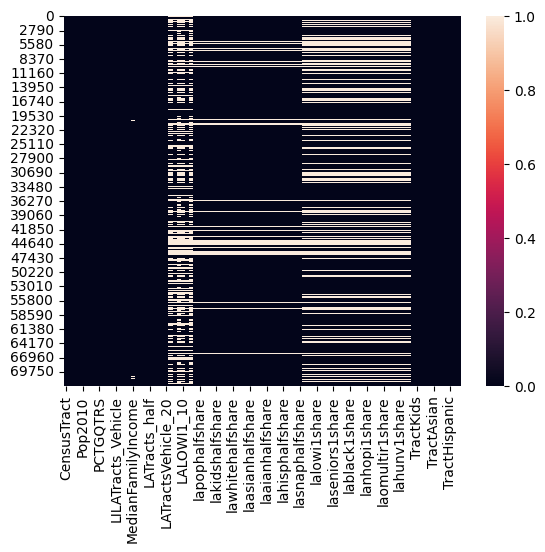

In [13]:
sns.heatmap(df.isnull())

In [14]:
''' dropping rows with missing value as imputing them can lead to biases considering 
 the high variability of the dataset '''

df = df.dropna() 

In [16]:
df.shape

(36230, 95)

### EDA

In [17]:
for col in df.columns:
    if df[col].isnull().sum()/df.shape[0]*100 > 50: 
        print(col)
        plt.figure(figsize=(10,4))
        sns.boxplot(data=df, x=col)
        plt.show()

In [18]:
df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome',
       'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1',
       'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10',
       'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare',
       'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare',
       'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare',
       'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare',
       'lasnaphalf', 'lasna

<AxesSubplot: xlabel='PovertyRate', ylabel='MedianFamilyIncome'>

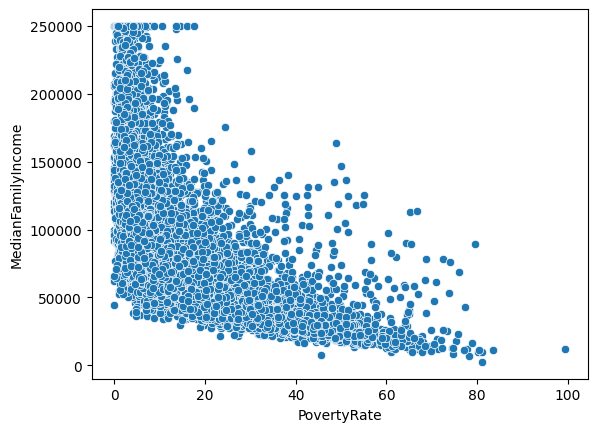

In [20]:
sns.scatterplot(data=df,x = 'PovertyRate', y = 'MedianFamilyIncome')

<AxesSubplot: xlabel='PovertyRate', ylabel='TractSNAP'>

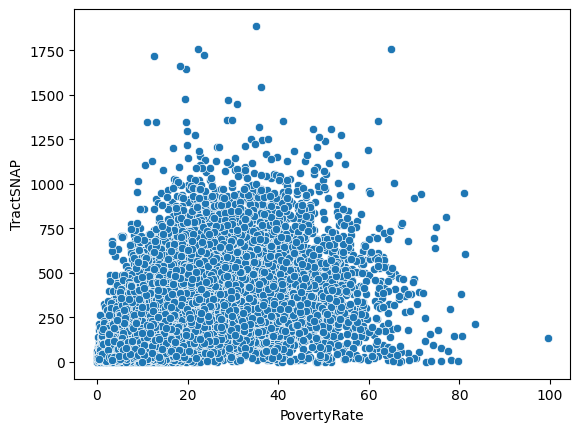

In [21]:
sns.scatterplot(data=df,x = 'PovertyRate', y = 'TractSNAP')

<AxesSubplot: xlabel='PovertyRate', ylabel='TractSNAP'>

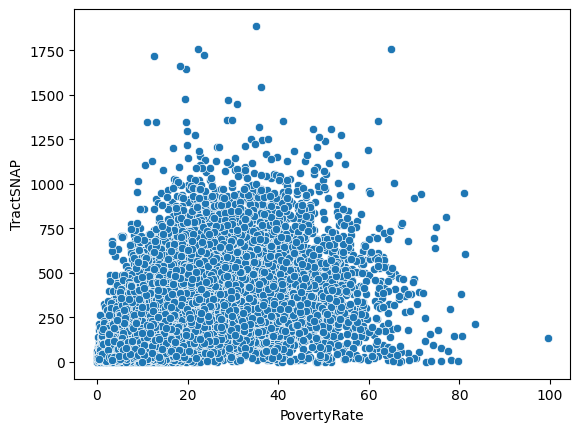

In [22]:
sns.scatterplot(data=df,x = 'PovertyRate', y = 'TractSNAP')

In [23]:
for col in df.columns:
    print(col)

CensusTract
State
County
Urban
Pop2010
OHU2010
GroupQuartersFlag
NUMGQTRS
PCTGQTRS
LILATracts_1And10
LILATracts_halfAnd10
LILATracts_1And20
LILATracts_Vehicle
HUNVFlag
LowIncomeTracts
PovertyRate
MedianFamilyIncome
LA1and10
LAhalfand10
LA1and20
LATracts_half
LATracts1
LATracts10
LATracts20
LATractsVehicle_20
LAPOP1_10
LAPOP05_10
LAPOP1_20
LALOWI1_10
LALOWI05_10
LALOWI1_20
lapophalf
lapophalfshare
lalowihalf
lalowihalfshare
lakidshalf
lakidshalfshare
laseniorshalf
laseniorshalfshare
lawhitehalf
lawhitehalfshare
lablackhalf
lablackhalfshare
laasianhalf
laasianhalfshare
lanhopihalf
lanhopihalfshare
laaianhalf
laaianhalfshare
laomultirhalf
laomultirhalfshare
lahisphalf
lahisphalfshare
lahunvhalf
lahunvhalfshare
lasnaphalf
lasnaphalfshare
lapop1
lapop1share
lalowi1
lalowi1share
lakids1
lakids1share
laseniors1
laseniors1share
lawhite1
lawhite1share
lablack1
lablack1share
laasian1
laasian1share
lanhopi1
lanhopi1share
laaian1
laaian1share
laomultir1
laomultir1share
lahisp1
lahisp1share
lahunv1

<AxesSubplot: xlabel='LowIncomeTracts', ylabel='ShareLOWI'>

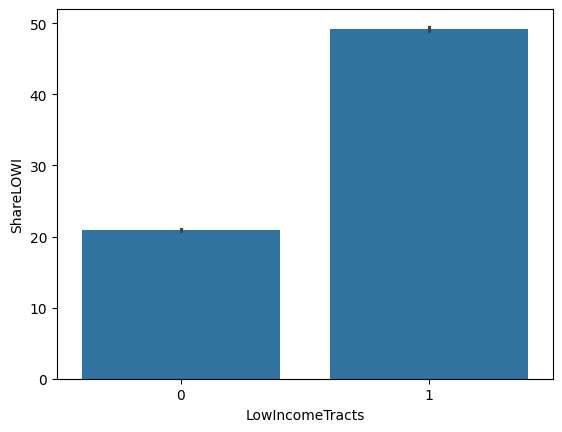

In [82]:
sns.barplot(data=df, x = 'LowIncomeTracts', y = 'ShareLOWI')

<AxesSubplot: xlabel='ShareSNAP', ylabel='ShareBlack'>

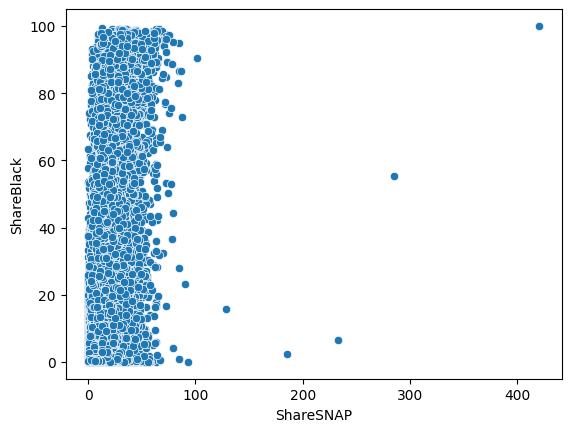

In [83]:
sns.scatterplot(data = df, y ='ShareBlack' , x ='ShareSNAP')

In [26]:
for col in df.columns:
    print(col)

# numeric_df['Pop2010']

CensusTract
State
County
Urban
Pop2010
OHU2010
GroupQuartersFlag
NUMGQTRS
PCTGQTRS
LILATracts_1And10
LILATracts_halfAnd10
LILATracts_1And20
LILATracts_Vehicle
HUNVFlag
LowIncomeTracts
PovertyRate
MedianFamilyIncome
LA1and10
LAhalfand10
LA1and20
LATracts_half
LATracts1
LATracts10
LATracts20
LATractsVehicle_20
LAPOP1_10
LAPOP05_10
LAPOP1_20
LALOWI1_10
LALOWI05_10
LALOWI1_20
lapophalf
lapophalfshare
lalowihalf
lalowihalfshare
lakidshalf
lakidshalfshare
laseniorshalf
laseniorshalfshare
lawhitehalf
lawhitehalfshare
lablackhalf
lablackhalfshare
laasianhalf
laasianhalfshare
lanhopihalf
lanhopihalfshare
laaianhalf
laaianhalfshare
laomultirhalf
laomultirhalfshare
lahisphalf
lahisphalfshare
lahunvhalf
lahunvhalfshare
lasnaphalf
lasnaphalfshare
lapop1
lapop1share
lalowi1
lalowi1share
lakids1
lakids1share
laseniors1
laseniors1share
lawhite1
lawhite1share
lablack1
lablack1share
laasian1
laasian1share
lanhopi1
lanhopi1share
laaian1
laaian1share
laomultir1
laomultir1share
lahisp1
lahisp1share
lahunv1

In [27]:
# Calculate share for each demographic category

df['ShareLOWI'] = df['TractLOWI'] / df['Pop2010']*100
df['ShareKids'] = df['TractKids'] / df['Pop2010']*100
df['ShareSeniors'] = df['TractSeniors'] / df['Pop2010']*100
df['ShareWhite'] = df['TractWhite'] / df['Pop2010']*100
df['ShareBlack'] = df['TractBlack'] / df['Pop2010']*100
df['ShareAsian'] = df['TractAsian'] / df['Pop2010']*100
df['ShareNHOPI'] = df['TractNHOPI'] / df['Pop2010']*100
df['ShareAIAN'] = df['TractAIAN'] / df['Pop2010']*100
df['ShareOMultir'] = df['TractOMultir'] / df['Pop2010']*100
df['ShareHispanic'] = df['TractHispanic'] / df['Pop2010']*100
df['ShareHUNV'] = df['TractHUNV'] / df['OHU2010']*100
df['ShareSNAP'] = df['TractSNAP'] / df['OHU2010']*100


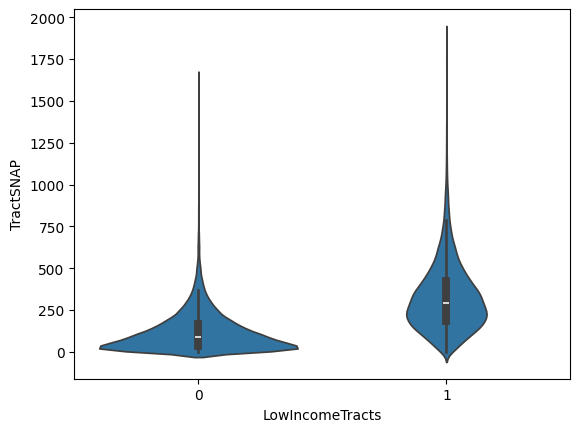

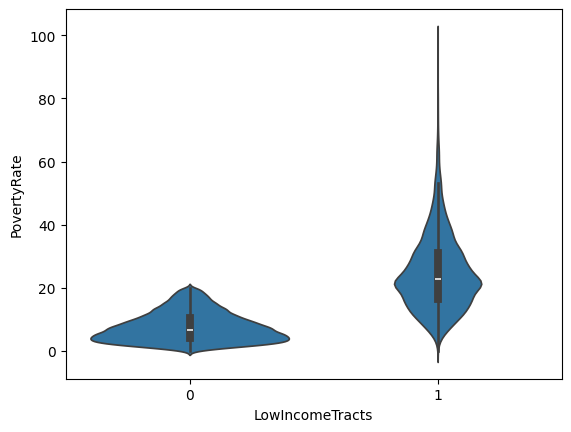

In [28]:
sns.violinplot(data=df, y = 'TractSNAP', x = 'LowIncomeTracts')
plt.show()
sns.violinplot(data=df, y = 'PovertyRate', x = 'LowIncomeTracts')
plt.show()

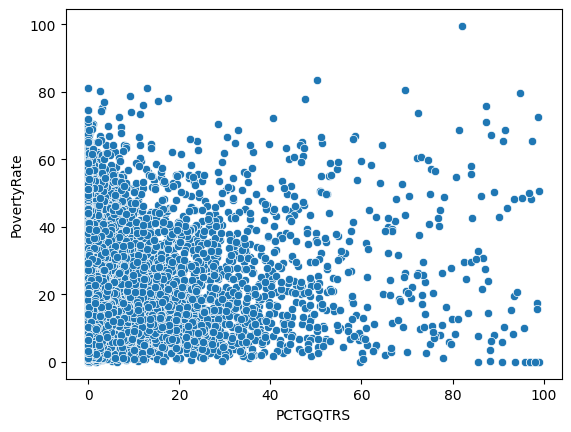

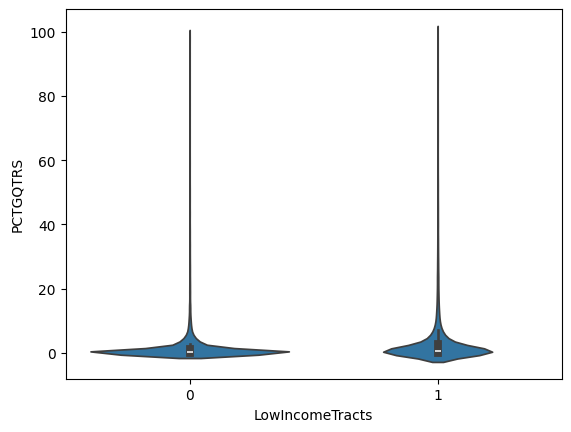

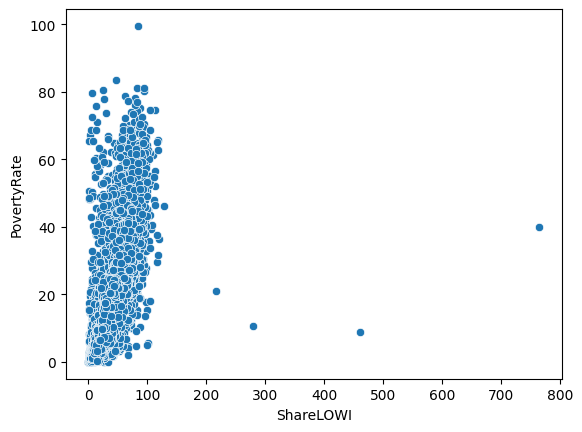

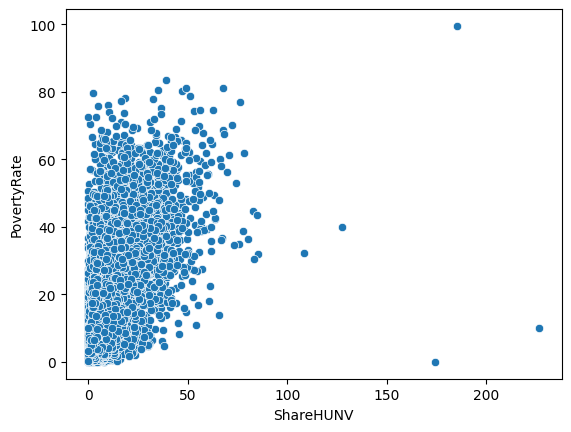

In [29]:
sns.scatterplot(data=df, x = 'PCTGQTRS', y='PovertyRate')
plt.show()

sns.violinplot(data=df, y = 'PCTGQTRS', x='LowIncomeTracts')
plt.show()

sns.scatterplot(data=df, x = 'ShareLOWI', y='PovertyRate')
plt.show()

sns.scatterplot(data=df, x = 'ShareHUNV', y='PovertyRate')
plt.show()

<AxesSubplot: xlabel='lalowi1share'>

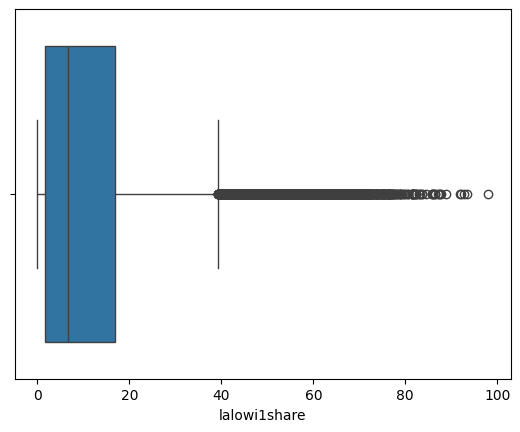

In [30]:
sns.boxplot(data=df, x = 'lalowi1share')

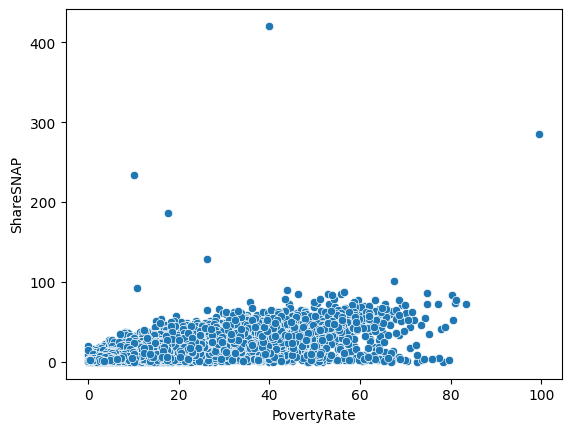

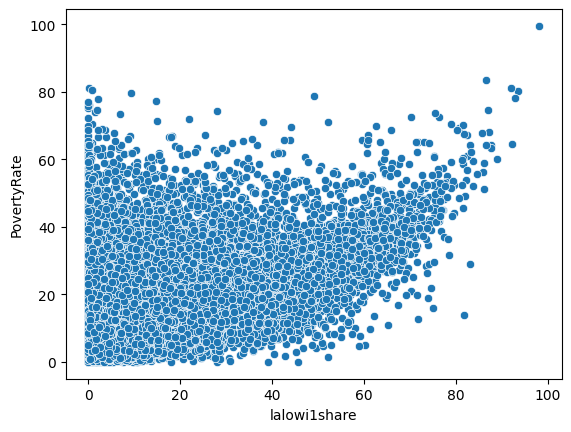

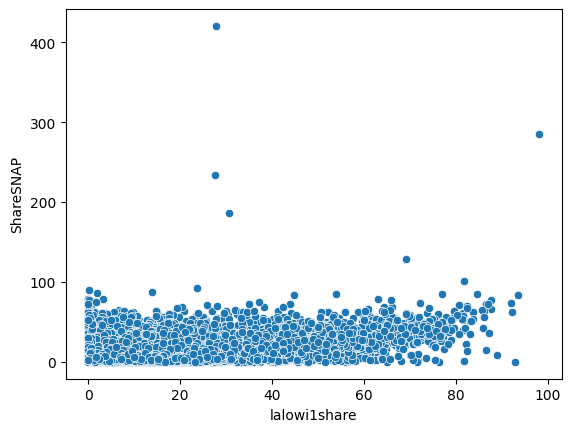

In [31]:
sns.scatterplot(data=df, y = 'ShareSNAP', x = 'PovertyRate')
plt.show()

sns.scatterplot(data=df, x = 'lalowi1share', y = 'PovertyRate')
plt.show()

sns.scatterplot(data=df, x = 'lalowi1share', y = 'ShareSNAP')
plt.show()

In [84]:
# Feature Selection

'PovertyRate'
'ShareWhite'
'ShareBlack'
'ShareAsian'
'ShareNHOPI'
'ShareOMultir'
'ShareHispanic'
'ShareSNAP'

'ShareSNAP'

### Clustering

<i>Problem Statement: Exploring the pattern of races, poverty, and SNAP share across census tract</i>

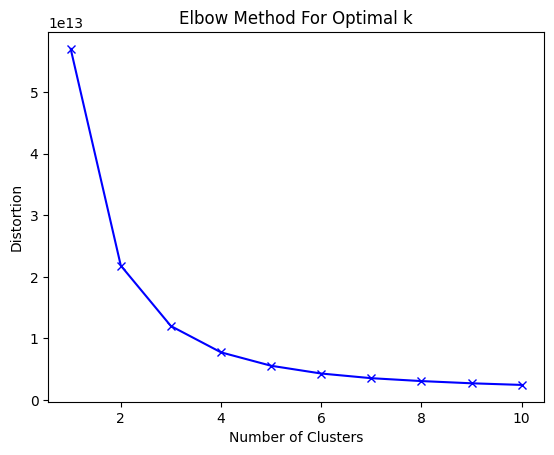

In [85]:
#performing elbow method to get the optimal number of clusters

data = df.copy()
data.drop(['CensusTract','State', 'County'], axis='columns', inplace=True)
distortions = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
#standarising the features before clustering

data = df.copy()

selected_columns = ['PovertyRate','ShareWhite','ShareBlack','ShareAsian', 'ShareNHOPI', 'ShareOMultir', 'ShareHispanic','ShareSNAP']

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[selected_columns])


In [95]:
# performing KMeans on the selected columns

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(standardized_data)
data['Cluster'] = clusters


In [96]:
# performing hierarchical clustering over the selected columns

n_clusters = 5
agglomerative = AgglomerativeClustering(n_clusters)
hierarchical_clusters = agglomerative.fit_predict(standardized_data)
data['Hierarchical_Cluster'] = hierarchical_clusters

In [36]:
data.to_csv('trial_2.csv')

In [37]:
#performing DBSCAN over the selected columns

eps = 0.2  
min_samples = 6
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_clusters = dbscan.fit_predict(standardized_data)

data['DBSCAN_Cluster'] = dbscan_clusters

In [38]:
#Silhouette Score for KMeans Clustering

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(standardized_data, clusters)
print("Silhouette Score for KMeans Clustering:", silhouette_avg)

Silhouette Score for KMeans Clustering: 0.34296780190008314


In [88]:
#Silhouette Score for Hierarchical Clustering

hierarchical_silhouette_score = silhouette_score(standardized_data, hierarchical_clusters)
print("Silhouette Score for Hierarchical clustering:", hierarchical_silhouette_score)

Silhouette Score for Hierarchical clustering: 0.3306891026454254


In [40]:
#Silhouette Score for DBSCAN Clustering

dbscan_silhouette_score = silhouette_score(standardized_data, data['DBSCAN_Cluster'])
print("Silhouette Score for DBSCAN clustering:", dbscan_silhouette_score)

Silhouette Score for DBSCAN clustering: -0.4645125871520248


In [42]:
#getting the mean of each feature accross each cluster for KMeans clustering

data['Cluster'] = clusters

cluster_profiles = data.groupby('Cluster').mean()

print("Cluster Profiles:")
print(cluster_profiles[selected_columns])


Cluster Profiles:
         PovertyRate  ShareWhite  ShareBlack  ShareAsian  ShareNHOPI  \
Cluster                                                                
0           7.169498   87.211789    4.619002    3.294834    0.086415   
1          21.648738   74.956292   13.448157    2.173180    0.131795   
2          21.472870   60.246065    9.543884    3.217644    0.226824   
3           7.935888   52.103994    8.541168   27.633558    0.568478   
4          30.649756   20.808963   70.185744    1.153112    0.058410   
5          13.795338   21.011185    2.327164   29.885570   15.929503   

         ShareOMultir  ShareHispanic  ShareSNAP  
Cluster                                          
0            4.242190       6.902344   5.686982  
1            7.528043      10.933039  18.874199  
2           25.296331      57.677197  20.530665  
3           10.604842      14.522560   5.600266  
4            5.512924       6.768676  30.395590  
5           30.294672      12.771588  17.951581  


C:\Users\PC\AppData\Local\Temp\ipykernel_18948\1975114214.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data.groupby('Cluster').mean()


In [138]:
#getting the mean of each feature accross each cluster for Hierarchical Clustering

data['Cluster'] = clusters

'Hierarchical_Cluster'

cluster_profiles = data.groupby('Hierarchical_Cluster').mean()

print("Cluster Profiles:")
print(cluster_profiles[selected_columns])

Cluster Profiles:
                      PovertyRate  ShareWhite  ShareBlack  ShareAsian  \
Hierarchical_Cluster                                                    
0                        9.196575   50.173205   10.549362   25.065927   
1                       19.294692   61.254854   10.842254    3.226642   
2                       28.051864   24.476346   68.894894    1.228365   
3                        7.434169   87.580793    4.260409    3.366859   
4                       23.237644   75.211522   12.379022    1.914216   

                      ShareNHOPI  ShareOMultir  ShareHispanic  ShareSNAP  
Hierarchical_Cluster                                                      
0                       1.241886     12.372384      16.343586   7.532792  
1                       0.169389     23.175192      53.066586  17.946773  
2                       0.055130      4.936106       5.757247  27.580086  
3                       0.093103      4.114830       6.335327   5.883636  
4                   

In [98]:
#Intra and Inter Cluster Distance for KMeans Clustering

centroids = data.groupby('Cluster')[selected_columns].mean()

intra_cluster_distances = []
for cluster_label, centroid in centroids.iterrows():
    cluster_data = data[data['Cluster'] == cluster_label][selected_columns]
    distances = np.linalg.norm(cluster_data - centroid, axis=1)
    intra_cluster_distances.append(distances.mean())

# Calculating inter-cluster distances
inter_cluster_distances = []
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        inter_distance = np.linalg.norm(centroids.iloc[i] - centroids.iloc[j])
        inter_cluster_distances.append(inter_distance)

# Interpretation
print("Mean Intra-cluster Distance(KMeans CLustering):", np.mean(intra_cluster_distances))
print("Mean Inter-cluster Distance(KMeans CLustering):", np.mean(inter_cluster_distances))


Mean Intra-cluster Distance(KMeans CLustering): 25.40414823500925
Mean Inter-cluster Distance(KMeans CLustering): 65.4422212684788


In [48]:
#Intra and Inter Cluster Distance for Hierarchical Clustering Clustering and DBSCAN 

def intra_cluster_distance(data, labels):
    distances = []
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_cluster_dist = np.mean(euclidean_distances(cluster_points))
            distances.append(intra_cluster_dist)
    return np.mean(distances)

def inter_cluster_distance(data, labels):
    centroid_distances = []
    for label1 in np.unique(labels):
        for label2 in np.unique(labels):
            if label1 != label2:
                centroid1 = np.mean(data[labels == label1], axis=0)
                centroid2 = np.mean(data[labels == label2], axis=0)
                centroid_distances.append(np.linalg.norm(centroid1 - centroid2))
    return np.mean(centroid_distances)


hierarchical_intra_dist = intra_cluster_distance(standardized_data, hierarchical_clusters)
hierarchical_inter_dist = inter_cluster_distance(standardized_data, hierarchical_clusters)

print("Hierarchical Clustering:")
print("Intra-cluster distance:", hierarchical_intra_dist)
print("Inter-cluster distance:", hierarchical_inter_dist)

# DBSCAN clustering
dbscan_intra_dist = intra_cluster_distance(standardized_data, dbscan_clusters)
dbscan_inter_dist = inter_cluster_distance(standardized_data, dbscan_clusters)

print("\nDBSCAN Clustering:")
print("Intra-cluster distance:", dbscan_intra_dist)
print("Inter-cluster distance:", dbscan_inter_dist)


Hierarchical Clustering:
Intra-cluster distance: 3.99971823450599
Inter-cluster distance: 8.27506613088771

DBSCAN Clustering:
Intra-cluster distance: 0.28011135394275843
Inter-cluster distance: 2.68621817997834


In [105]:
# Performing isolation forest to get the outliers

selected_data = data[selected_columns]

isolation_forest = IsolationForest()

isolation_forest.fit(selected_data)

outlier_preds = isolation_forest.predict(selected_data)

data['outlier'] = outlier_preds


In [119]:
data[data['outlier'] == -1].shape[0]

5801

In [52]:
centroids = data.groupby('Cluster').mean()

print(centroids[selected_columns])


         PovertyRate  ShareWhite  ShareBlack  ShareAsian  ShareNHOPI  \
Cluster                                                                
0           7.169498   87.211789    4.619002    3.294834    0.086415   
1          21.648738   74.956292   13.448157    2.173180    0.131795   
2          21.472870   60.246065    9.543884    3.217644    0.226824   
3           7.935888   52.103994    8.541168   27.633558    0.568478   
4          30.649756   20.808963   70.185744    1.153112    0.058410   
5          13.795338   21.011185    2.327164   29.885570   15.929503   

         ShareOMultir  ShareHispanic  ShareSNAP  
Cluster                                          
0            4.242190       6.902344   5.686982  
1            7.528043      10.933039  18.874199  
2           25.296331      57.677197  20.530665  
3           10.604842      14.522560   5.600266  
4            5.512924       6.768676  30.395590  
5           30.294672      12.771588  17.951581  


C:\Users\PC\AppData\Local\Temp\ipykernel_18948\1447789302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('Cluster').mean()


In [102]:
centroids = data.groupby('Hierarchical_Cluster').mean()

print(centroids[selected_columns])



                      PovertyRate  ShareWhite  ShareBlack  ShareAsian  \
Hierarchical_Cluster                                                    
0                        9.196575   50.173205   10.549362   25.065927   
1                       19.294692   61.254854   10.842254    3.226642   
2                       28.051864   24.476346   68.894894    1.228365   
3                        7.434169   87.580793    4.260409    3.366859   
4                       23.237644   75.211522   12.379022    1.914216   

                      ShareNHOPI  ShareOMultir  ShareHispanic  ShareSNAP  
Hierarchical_Cluster                                                      
0                       1.241886     12.372384      16.343586   7.532792  
1                       0.169389     23.175192      53.066586  17.946773  
2                       0.055130      4.936106       5.757247  27.580086  
3                       0.093103      4.114830       6.335327   5.883636  
4                       0.112375      

In [71]:
trial_df = df.copy()

In [72]:
trial_df.shape

(36230, 107)

In [73]:
trial_df['Cluster'] = clusters
trial_df['Hierarchical_Cluster'] = hierarchical_clusters

In [74]:
centroids = trial_df.groupby('Hierarchical_Cluster').mean()

print(centroids[selected_columns])


                      PovertyRate  ShareWhite  ShareBlack  ShareAsian  \
Hierarchical_Cluster                                                    
0                       19.294692   61.254854   10.842254    3.226642   
1                       12.629073   19.842856    2.051524   32.462597   
2                       28.051864   24.476346   68.894894    1.228365   
3                        7.434169   87.580793    4.260409    3.366859   
4                       23.237644   75.211522   12.379022    1.914216   
5                        9.040552   51.551857   10.935627   24.729715   

                      ShareNHOPI  ShareOMultir  ShareHispanic  ShareSNAP  
Hierarchical_Cluster                                                      
0                       0.169389     23.175192      53.066586  17.946773  
1                      15.088561     30.234677      12.278630  16.704687  
2                       0.055130      4.936106       5.757247  27.580086  
3                       0.093103      4.

C:\Users\PC\AppData\Local\Temp\ipykernel_18948\2734734435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = trial_df.groupby('Hierarchical_Cluster').mean()


In [ ]:
trial_df = data.copy()

state_distribution = data.groupby('Cluster')['State'].count()
print(state_distribution)


Cluster
0    19517
1     7777
2     3779
3     1701
4     3378
5       78
Name: State, dtype: int64


In [ ]:
# adding the latitude and longitude of states in data

selected_columns = ['PovertyRate', 'ShareWhite', 'ShareBlack', 'ShareAsian', 'ShareNHOPI', 'ShareOMultir', 'ShareHispanic', 'ShareSNAP']

X = data[selected_columns]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters as needed
data['Cluster'] = kmeans.fit_predict(X)

# Load state coordinates data (latitude and longitude)
state_coordinates = pd.read_csv('us-state-capitals.csv')  # Assuming you have a CSV file with state coordinates

# Merge state coordinates with clustered data
merged_data = pd.merge(data, state_coordinates, on='State')

In [62]:
import pandas as pd
import folium
from sklearn.cluster import KMeans



# Create a map centered around the SA
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Define colors for clusters
cluster_colors = ['blue', 'red', 'green', 'purple', 'orange','pink']  # Adjust as needed

# Loop through each state and add to map
for index, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_colors[row['Cluster']],
        fill=True,
        fill_color=cluster_colors[row['Cluster']],
        fill_opacity=0.7,
        tooltip=row['State'] + ' (Cluster ' + str(row['Cluster']) + ')'
    ).add_to(usa_map)

usa_map.save('cluster_map.html')


In [80]:
import pandas as pd
import folium
from sklearn.cluster import KMeans

# # selected_columns = ['PovertyRate', 'ShareWhite', 'ShareBlack', 'ShareAsian', 'ShareNHOPI', 'ShareOMultir', 'ShareHispanic', 'ShareSNAP']

# # X = data[selected_columns]

# # # Perform KMeans clustering
# # kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters as needed
# # data['Cluster'] = kmeans.fit_predict(X)

# # Load state coordinates data (latitude and longitude)
# state_coordinates = pd.read_csv('us-state-capitals.csv')  # Assuming you have a CSV file with state coordinates

# # Merge state coordinates with clustered data
# merged_data = pd.merge(data, state_coordinates, on='State')

# Create a map centered around the SA
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Define colors for clusters
cluster_colors = ['blue', 'red', 'green', 'purple', 'orange','pink']  # Adjust as needed

# Loop through each state and add to map
for index, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_colors[row['Hierarchical_Cluster']],
        fill=True,
        fill_color=cluster_colors[row['Hierarchical_Cluster']],
        fill_opacity=0.7,
        tooltip=row['State'] + ' (Hierarchical_Cluster'  + str(row['Hierarchical_Cluster']) + ')'
    ).add_to(usa_map)

usa_map.save('cluster_map_hc.html')


In [133]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

cluster_colors = ['blue', 'red', 'green', 'purple', 'orange','pink']  # Adjust as needed

legend_html = '<div style="position:fixed; bottom:50px; left:50px; z-index:1000; background-color:white; padding:10px; border:2px solid grey;">'
for i, color in enumerate(cluster_colors):
    legend_html += '<p style="color:{}; font-weight:bold;">Cluster {}: </p>'.format(color, i)
legend_html += '</div>'
usa_map.get_root().html.add_child(folium.Element(legend_html))

for index, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_colors[row['Cluster']],
        fill=True,
        fill_color=cluster_colors[row['Cluster']],
        fill_opacity=0.7,
        tooltip=row['State'] + ' (Cluster ' + str(row['Cluster']) + ')'
    ).add_to(usa_map)

usa_map.save('cluster_map_with_add.html')

In [140]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

cluster_colors = ['blue', 'red', 'green', 'purple', 'orange','pink']  # Adjust as needed

legend_html = '<div style="position:fixed; bottom:50px; left:50px; z-index:1000; background-color:white; padding:10px; border:2px solid grey;">'
for i, color in enumerate(cluster_colors):
    legend_html += '<p style="color:{}; font-weight:bold;">Cluster {}: </p>'.format(color, i)
legend_html += '</div>'
usa_map.get_root().html.add_child(folium.Element(legend_html))

for index, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_colors[row['Hierarchical_Cluster']],
        fill=True,
        fill_color=cluster_colors[row['Cluster']],
        fill_opacity=0.7,
        tooltip=row['State'] + ' (Hierarchical_Cluster ' + str(row['Hierarchical_Cluster']) + ')'
    ).add_to(usa_map)

usa_map.save('cluster_map_with_add_hc.html')
